# 2.2 Exercises: Tree Maps, Area Charts, Stacked Area Charts, Step Charts
# Rahul Rajeev

In [1]:
# libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [99]:
# expenditures
expenditures = pd.read_csv("expenditures.txt", sep="\t")
expenditures.to_csv('expenditures.csv')
expenditures.head()

,year,category,expenditure,sex
0,2008,Food,6443,1
1,2008,Alcoholic Beverages,444,1
2,2008,Housing,17109,1
3,2008,Apparel,1801,1
4,2008,Transportation,8604,1


In [11]:
# unemployment rate
unemployment = pd.read_csv('unemployement-rate-1948-2010.csv')
unemployment.head()

,Series id,Year,Period,Value
0,LNS14000000,1948,M01,3.4
1,LNS14000000,1948,M02,3.8
2,LNS14000000,1948,M03,4.0
3,LNS14000000,1948,M04,3.9
4,LNS14000000,1948,M05,3.5


In [15]:
# us postage
postage = pd.read_excel('us-postage.xlsm')
postage

,Year,Price
0,1991,0.29
1,1995,0.32
2,1999,0.33
3,2001,0.34
4,2002,0.37
5,2006,0.39
6,2007,0.41
7,2008,0.42
8,2009,0.44
9,2010,0.44


In [17]:
# world-population
worldpop = pd.read_excel('world-population.xlsm')
worldpop.head()

,Year,Population
0,1960,3028654024
1,1961,3068356747
2,1962,3121963107
3,1963,3187471383
4,1964,3253112403


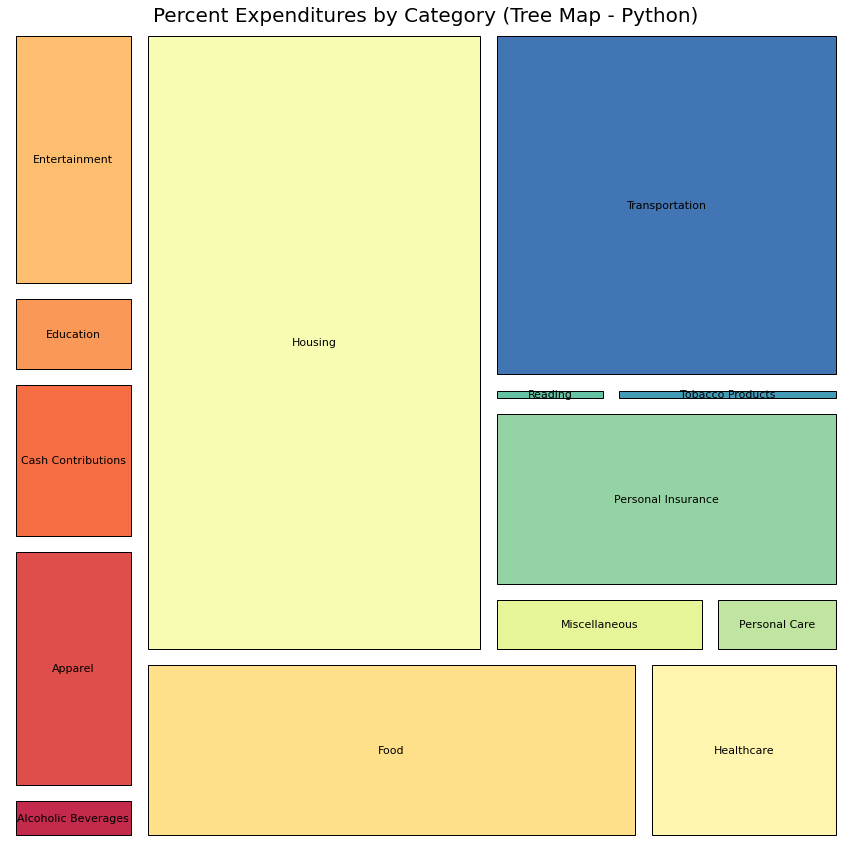

In [102]:
# treemap for expenditures df, category vs. expenditure
import squarify
expenditures_grouped = expenditures.groupby(['category'])['expenditure'].sum().reset_index()
#expenditures_grouped.to_csv('expenditures_grouped.csv')
plt.figure(figsize=(15,15))
squarify.plot(sizes=expenditures_grouped['expenditure'], label = expenditures_grouped['category'], 
             color=sns.color_palette("Spectral", len(expenditures_grouped['category'])), pad=1, ec='black',
             text_kwargs = {'fontsize': 11})
plt.title('Percent Expenditures by Category (Tree Map - Python)', fontsize = 20)
plt.axis("off")
plt.show()

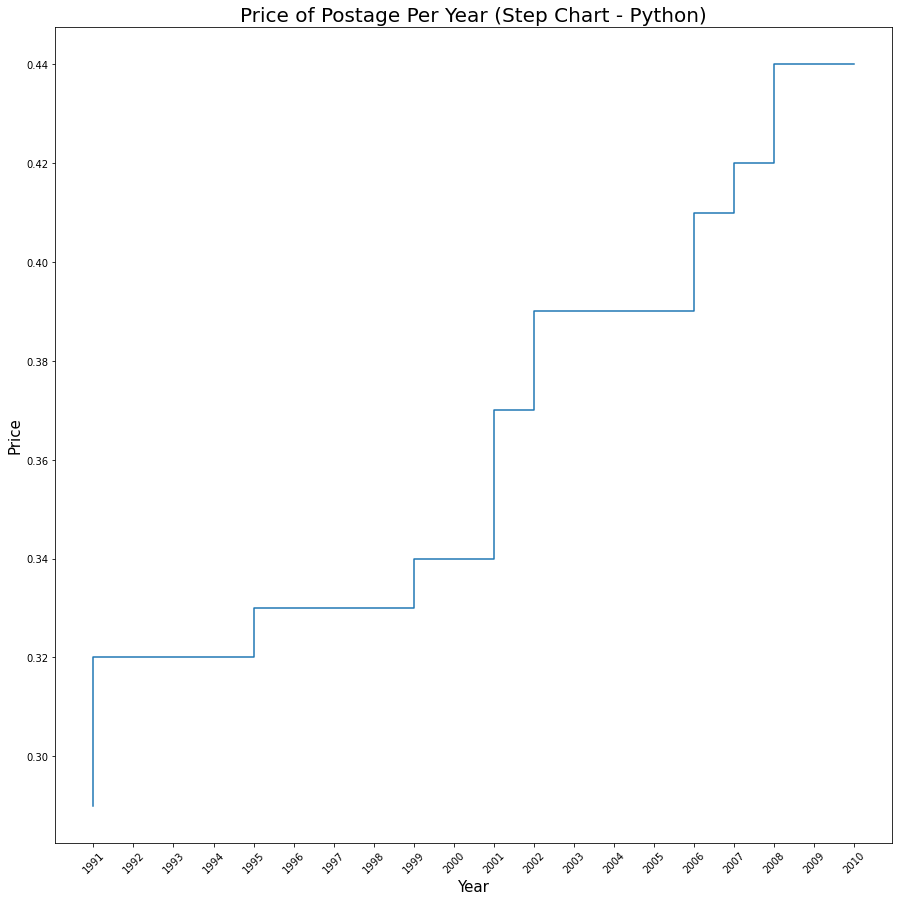

In [53]:
# step chart for postage cost
plt.figure(figsize=(15,15))
plt.step(x='Year', y='Price',data=postage)
plt.xlabel('Year', fontsize=15)
plt.ylabel('Price', fontsize=15)
plt.xticks(ticks = np.arange(1991, 2011), rotation=45)
plt.title('Price of Postage Per Year (Step Chart - Python)', fontsize = 20)
plt.show()

In [101]:
#unemployment_grouped.to_csv('unemployment_grouped.csv')

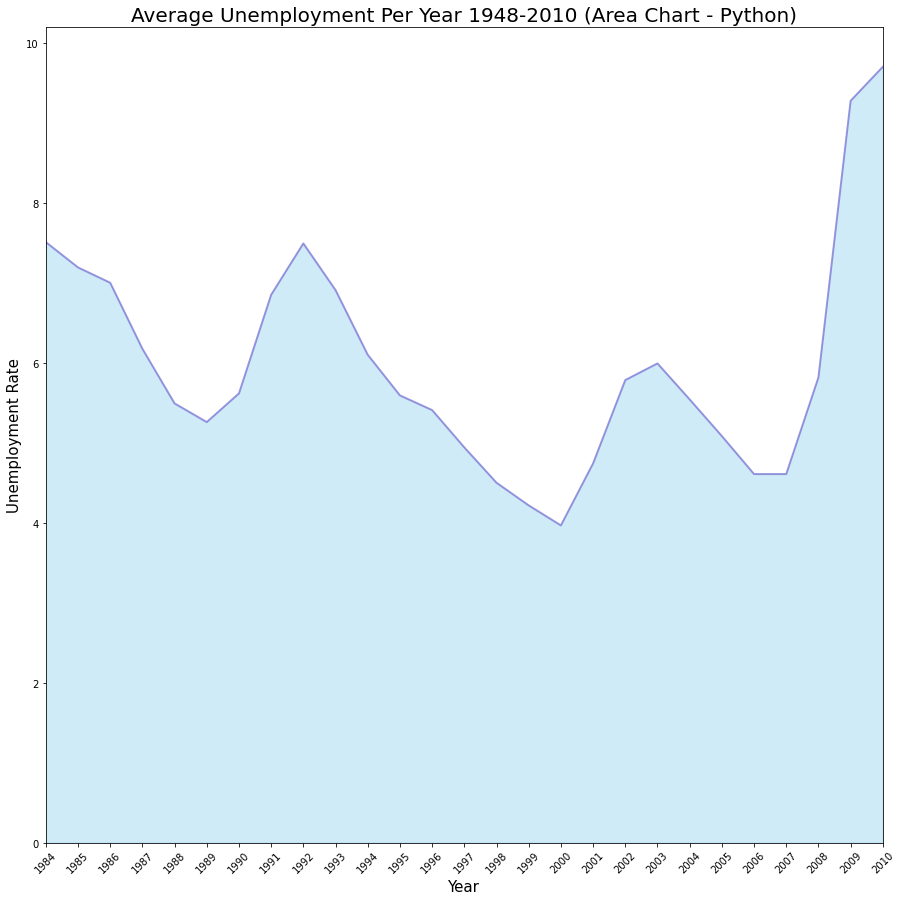

In [95]:
# area chart - average unemployment rates per year
unemployment_grouped = unemployment.groupby(['Year'])['Value'].mean().reset_index()
plt.figure(figsize=(15,15))
plt.fill_between(np.arange(1948, 2011), unemployment_grouped['Value'],
                 color="skyblue", alpha=0.4)
plt.plot(np.arange(1948, 2011), unemployment_grouped['Value'], color="Slateblue",
         alpha=0.6, linewidth=2)
plt.xticks(np.arange(1948, 2011), rotation = 45)
plt.title('Average Unemployment Per Year 1948-2010 (Area Chart - Python)', fontsize = 20)
plt.xlabel('Year', size=15)
plt.ylabel('Unemployment Rate', size=15)
plt.xlim(1984, 2010)
plt.ylim(bottom=0)
plt.show()

In [63]:
# transposing the expenditures dataframe to have categories as columns and expenditures as rows per year
categories = expenditures['category'].unique()
all_year_lists = []
for year in expenditures['year'].unique():
    yearlist = expenditures[expenditures['year'] == year]['expenditure'].to_list()
    all_year_lists.append(yearlist)

In [84]:
# creating the transposed dataframe
expenditures_t = pd.DataFrame(all_year_lists, columns = categories)
expenditures_t.insert(0,'year', expenditures['year'].unique())
expenditures_t = expenditures_t.sort_values(by='year', ascending=True)
expenditures_t.head()

# save transposed expenditures file

,year,Food,Alcoholic Beverages,Housing,Apparel,Transportation,Healthcare,Entertainment,Personal Care,Reading,Education,Tobacco Products,Miscellaneous,Cash Contributions,Personal Insurance
24,1984,3290,275,6674,1319,4304,1049,1055,289,132,303,228,451,706,1897
23,1985,3477,306,7087,1420,4587,1108,1170,303,141,321,219,529,805,2016
22,1986,3448,271,7292,1346,4842,1135,1149,303,140,314,230,522,746,2127
21,1987,3664,289,7569,1446,4600,1135,1193,330,142,337,232,562,741,2175
20,1988,3748,269,8079,1489,5093,1298,1329,334,150,342,242,578,693,2249


In [100]:
#expenditures_t.to_csv('expenditures_t.csv')

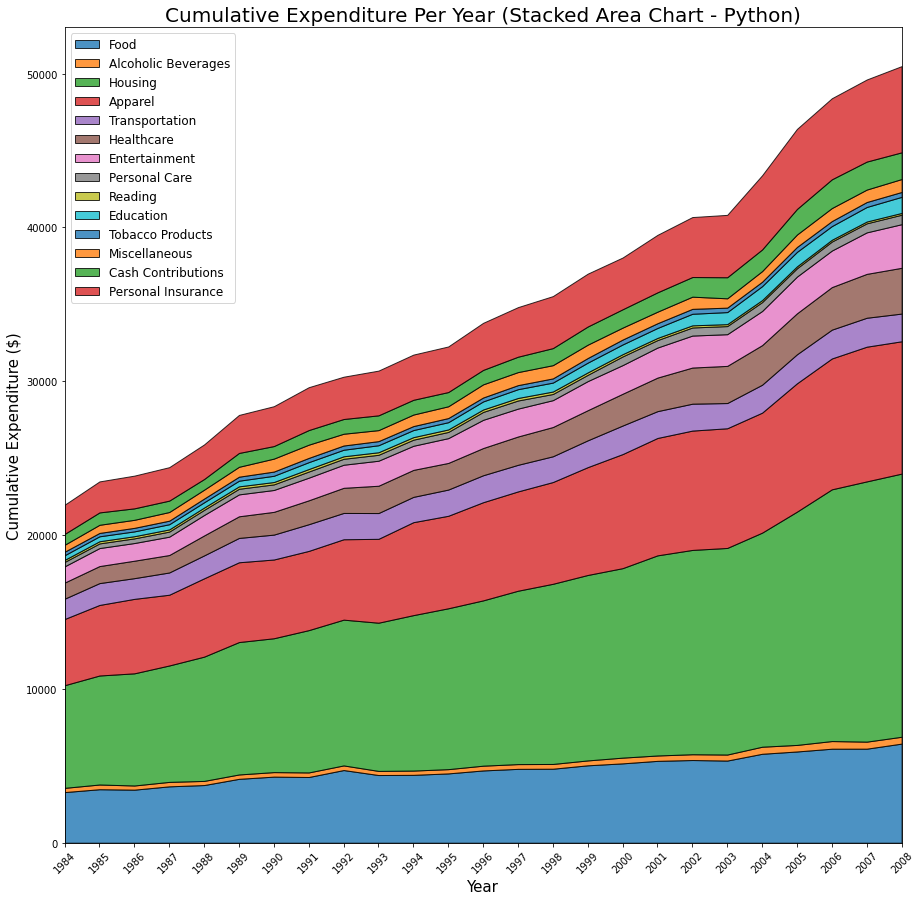

In [83]:
# stacked area chart - expenditures by category
plt.figure(figsize=(15,15))
plt.stackplot(expenditures_t['year'],
              [expenditures_t['Food'], expenditures_t['Alcoholic Beverages'], expenditures_t['Housing'], 
               expenditures_t['Transportation'], expenditures_t['Apparel'], expenditures_t['Healthcare'], 
               expenditures_t['Entertainment'], expenditures_t['Personal Care'], expenditures_t['Reading'],
               expenditures_t['Education'], expenditures_t['Tobacco Products'], expenditures_t['Miscellaneous'], 
               expenditures_t['Cash Contributions'], expenditures_t['Personal Insurance']],
              labels=expenditures_t.columns[1:], ec='black',
              alpha=0.8)
plt.legend(loc=2, fontsize='large')
plt.xlabel('Year', fontsize=15)
plt.ylabel('Cumulative Expenditure ($)', fontsize=15)
plt.title('Cumulative Expenditure Per Year (Stacked Area Chart - Python)', fontsize = 20)
plt.xticks(ticks = np.arange(1984, 2009), rotation=45)
plt.xlim(1984, 2008)
plt.show()